# 数据处理02：Python数值计算包NumPy
NumPy 是一个专用于数值计算的第三方包，它提供了实现高效存储与快速操作的多维数组对象，可以说是整个 Python 数据科学生态系统的核心，项目官网 https://www.numpy.org/

NumPy 已包含于 Anaconda 中，导入模块时请按惯例使用 np 作为别名： 

In [1]:
import numpy as np
np.__version__  # 查看版本号

'1.15.4'

NumPy 多维数组类名为 ndarray，其中的元素必须类型一致。创建数组的基本方式是调用 array 函数并以一个列表作为参数——如果传入的列表以若干相同长度列表为组成元素，则会创建一个二维数组（嵌套更多层将生成更高维度的数组）：

In [2]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [3]:
np.array([[4, 9, 2], [3, 5, 7], [8, 1, 6]])

array([[4, 9, 2],
       [3, 5, 7],
       [8, 1, 6]])

NumPy 多维数组属于可变的序列对象，支持标准的索引操作；对于多维数组可以用索引取到子数组，并支持用逗号分隔的多组索引；甚至还可以用数组作为“花式索引”：

In [4]:
a1, a2 = Out[2], Out[3]  # IPython 的一个小技巧
a1[0]

1

In [5]:
a2[1]

array([3, 5, 7])

In [6]:
a2[0][-1]

2

In [7]:
a2[0, -1]

2

In [8]:
a2[1:, :2]

array([[3, 5],
       [8, 1]])

In [9]:
a1[np.array([0, 2, 4])]  # 用数组进行索引

array([1, 3, 5])

NumPy 多维数组包含一些数据属性，例如维度 ndim，形状 shape（每个维度的项数），大小 size（总项数）以及数据类型 dtype——由于元素类型必须一致，赋值时如果遇到不同类型将会自动转换（这有可能丢失信息）：

In [10]:
print("a1维度:", a1.ndim)
print("a1形状:", a1.shape)
print("a1大小:", a1.size)
print("a1数据类型:", a1.dtype)

a1维度: 1
a1形状: (5,)
a1大小: 5
a1数据类型: int64


In [11]:
print("a2维度:", a2.ndim)
print("a2形状:", a2.shape)
print("a2大小:", a2.size)
print("a2数据类型:", a2.dtype)

a2维度: 2
a2形状: (3, 3)
a2大小: 9
a2数据类型: int64


In [12]:
a1[-1] = 3.14  # 浮点数将自动转换为整数
a1

array([1, 2, 3, 4, 3])

NumPy 多维数组也包含许多方法属性用来执行各种操作，例如转换类型 astype() 、改变形状 reshape()，求和 sum()，累积求和 cumsum()，均值 mean() 等等：

In [13]:
a1 = a1.astype(float)  # 转换数据类型为浮点数
a1[-1] = 3.14
a1

array([1.  , 2.  , 3.  , 4.  , 3.14])

In [14]:
a1.reshape(5, 1)  # 改变形状为5行1列

array([[1.  ],
       [2.  ],
       [3.  ],
       [4.  ],
       [3.14]])

In [15]:
a1.sum()  # 元素求和

13.14

In [16]:
a1.cumsum()  # 元素累积求和

array([ 1.  ,  3.  ,  6.  , 10.  , 13.14])

In [17]:
a1.mean()  # 元素均值

2.628

In [18]:
a2.cumsum(0)  # 按第0维（行）累积求和

array([[ 4,  9,  2],
       [ 7, 14,  9],
       [15, 15, 15]])

In [19]:
a2.cumsum(1)  # 按第1维（列）累积求和

array([[ 4, 13, 15],
       [ 3,  8, 15],
       [ 8,  9, 15]])

In [20]:
a2.mean(0)  # 按第0维（行）求均值

array([5., 5., 5.])

NumPy 中除了 array 等普通函数，还有许多特殊的“通用函数”（ufunc），专门用于对数组中的每个值执行同样运算即所谓“向量化”（Vectorize），这种操作非常高效。基本算术类通用函数也可直接写算术运算符，会在底层自动变为对应的通用函数：

In [21]:
np.add(a2, a2)  # 使用加法通用函数

array([[ 8, 18,  4],
       [ 6, 10, 14],
       [16,  2, 12]])

In [22]:
a2 + a2  # 使用加法运算符

array([[ 8, 18,  4],
       [ 6, 10, 14],
       [16,  2, 12]])

In [23]:
a1 * 2  # 乘法

array([2.  , 4.  , 6.  , 8.  , 6.28])

In [24]:
np.power(3, a1)  # 乘方

array([ 3.        ,  9.        , 27.        , 81.        , 31.48913565])

In [25]:
np.sin(a1)  # 正弦

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ,  0.00159265])

以上代码中数组乘以单个数值即其所有元素都乘以该数值，这种机制称为“广播”（Broadcast）——当二元运算发现形状不一致时就会尝试进行广播：首先在较小形状的左边补上项数为 1 的维度，然后扩展各个项数为 1 的维度来匹配形状，如果无法匹配则将引发异常：

In [26]:
np.arange(3)[:, np.newaxis]  # 生成序列数组并用索引方式改变形状

array([[0],
       [1],
       [2]])

In [27]:
a1 + Out[26]  # 形状为(5,)和(3,1)的两数组相加得到数组形状为(3,5)

array([[1.  , 2.  , 3.  , 4.  , 3.14],
       [2.  , 3.  , 4.  , 5.  , 4.14],
       [3.  , 4.  , 5.  , 6.  , 5.14]])

In [28]:
try:
    a1 + np.arange(3)  # 形状为(5,)和(3,)的两个数组相加将引发异常
except Exception as e:
    print(repr(e))

ValueError('operands could not be broadcast together with shapes (5,) (3,) ')


下面是之前曼德布罗分形图绘制程序的改进版，虽然还是同样的算法，但使用 NumPy 并配合辅助模块 Numba 将耗时的例程“即时编译”（JIT）为原生机器码，运行速度有成数量级的提升。Numba 官网 https://numba.pydata.org/

运行耗时：0.27733463999999985秒。


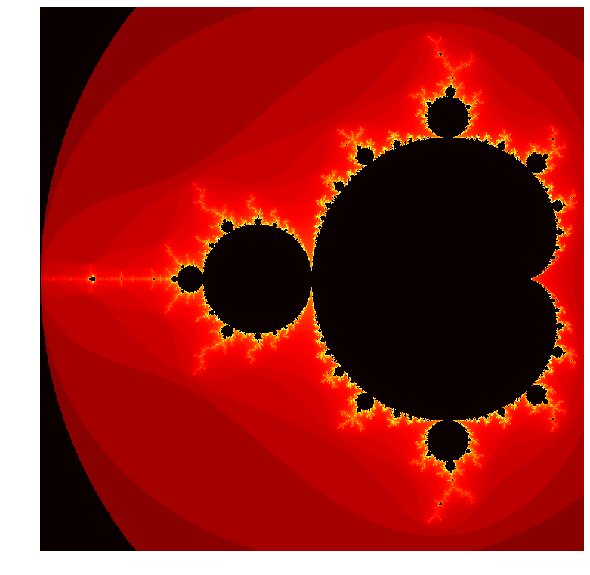

In [29]:
"""使用NumPy绘制曼德布罗分形图
"""
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from numba import jit, guvectorize, complex64, int32
%matplotlib inline


@jit(int32(complex64, int32))
def mandelbrot(c, maxiter):
    nreal = 0
    real = 0
    imag = 0
    for n in range(maxiter):
        nreal = real*real - imag*imag + c.real
        imag = 2 * real*imag + c.imag
        real = nreal
        if real * real + imag * imag > 4.0:
            return n
    return 0


@guvectorize([(complex64[:], int32[:], int32[:])], "(n),()->(n)", target="parallel")
def mandelbrot_numpy(c, maxit, output):
    maxiter = maxit[0]
    for i in range(c.shape[0]):
        output[i] = mandelbrot(c[i], maxiter)


def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:, None]*1j
    n3 = mandelbrot_numpy(c, maxiter)
    return (r1, r2, n3.T)


def mandelbrot_image(xmin, xmax, ymin, ymax, width=10, height=10, maxiter=256, cmap="jet", gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x, y, z = mandelbrot_set(xmin, xmax, ymin, ymax,
                             img_width, img_height, maxiter)
    plt.figure(figsize=(width, height), dpi=dpi)
    ticks = np.arange(0, img_width, 3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    plt.axis("off")
    norm = colors.PowerNorm(gamma)
    plt.imshow(z.T, cmap=cmap, norm=norm, origin="lower")


if __name__ == "__main__":
    t1 = time.process_time()
    mandelbrot_image(-2, 0.5, -1.25, 1.25, cmap="hot")
    print(f"运行耗时：{time.process_time() - t1}秒。")

要了解 NumPy 的更多细节，请查看官方文档 https://docs.scipy.org/doc/

——编程原来是这样……